In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error


In [2]:
#train = pd.read_csv('Robot_train.csv')
#test = pd.read_csv('Robot_test.csv')

#from sklearn.utils import shuffle
#train = shuffle(train)
#test = shuffle(test)

#y_train = train.pop('label')
#x_train = train
#y_test = test.pop('label')
#x_test = test

#x_train = np.array(x_train)
#y_train = np.array(y_train)

#x_test = np.array(x_test)
#y_test = np.array(y_test)
#x_train = scale(x_train)
#x_test = scale(x_test)

In [3]:
data = pd.read_csv('Robot_train.csv')
y = data.pop('label')

data.pop('X+Y')
data.pop('X-Y-Z')
data.pop('X/Y')
data.pop('X/Z')
data.pop('Y/Z')
data.pop('Y/X')
data.pop('Z/Y')
data.pop('Z/X')
data.pop('Y-Z')


x = data
x= scale(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100,shuffle=True)

In [4]:

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(14680, 17) (14680,) (3670, 17) (3670,)


In [5]:
models_names = []
accuracies_of_models = []
mse_of_models = []
mae_of_models = []


In [6]:
Logistic_Regression_model = LogisticRegression(max_iter=10000,solver='lbfgs',C=5.5)
Logistic_Regression_model.fit(x_train,y_train)

y_predicted_LR = Logistic_Regression_model.predict(x_test)
softmax_LR = Logistic_Regression_model.predict_proba(x_test)

weights_LR = Logistic_Regression_model.coef_
bias_LR = Logistic_Regression_model.intercept_

acc_LR= Logistic_Regression_model.score(x_test,y_test)
mse_LR = mean_squared_error(y_test,y_predicted_LR)
mae_LR = mean_absolute_error(y_test,y_predicted_LR)
med_ae_LR = median_absolute_error(y_test,y_predicted_LR)


models_names.append('LogisticRegression')
accuracies_of_models.append(acc_LR*100)
mse_of_models.append(mse_LR)
mae_of_models.append(mae_LR)

print('Weights : ' , weights_LR)
print('Bias : ' , bias_LR)
print('Softmax : ' , softmax_LR[:10])
print('Predicted Labels  : ' , y_predicted_LR[:10])
print('Accuracy : ' , acc_LR*100)
print('Mean Square Error : ' , mse_LR)
print('Mean Absolute Error : ' , mae_LR)
print('Median Absolute Error : ' , med_ae_LR)



Weights :  [[ 7.45813457e-01  1.75253901e+00 -6.09796863e-01  1.28204428e+00
   9.35663811e-01  4.20662587e-01  1.09723034e+00 -1.51710193e-01
   9.39356129e-01 -1.51710193e-01  6.04705974e-01 -4.85668147e-01
   6.29251371e-01  7.20450228e-01  8.57844440e-01  8.82709710e-01
   5.80048412e-01]
 [ 4.35495808e-01  8.52770194e-01  6.47776371e+00  5.93848013e-02
   2.36567397e+00  7.88027732e+00  1.58437476e+00  1.06922234e+00
   2.36750434e+00  1.06922234e+00  1.71985950e+00  6.51740858e+00
   1.73184454e+00  4.23135163e-01 -8.80697489e-01 -8.68703663e-01
   1.70754076e+00]
 [-3.92577479e-01  1.01311349e-01 -1.12566300e+01  1.21908492e+00
   6.18702656e+00 -1.04729511e+01 -1.47330802e+00  5.25844992e+00
   6.18734826e+00  5.25844992e+00 -2.63381072e+00 -1.12150753e+01
  -2.63246942e+00 -3.93928930e-01  1.88912128e+00  1.89070805e+00
  -2.63463599e+00]
 [ 8.23003304e-01  2.63598425e+00 -8.03427663e+00  2.52877046e+00
  -1.83812844e+00 -7.73530371e+00  5.53965328e-01 -2.26559886e+00
  -1.832

In [7]:
SVC_Linear_Kernel_model = SVC(C=1.5,kernel='linear',max_iter=10000)
SVC_Linear_Kernel_model.fit(x_train,y_train)


y_predicted_SVC_Linear = SVC_Linear_Kernel_model.predict(x_test)

weights_SVC_Linear = SVC_Linear_Kernel_model.coef_
bias_SVC_Linear = SVC_Linear_Kernel_model.intercept_

acc_SVC_Linear= SVC_Linear_Kernel_model.score(x_test,y_test)
mse_SVC_Linear = mean_squared_error(y_test,y_predicted_SVC_Linear)
mae_SVC_Linear = mean_absolute_error(y_test,y_predicted_SVC_Linear)
med_ae_SVC_Linear = median_absolute_error(y_test,y_predicted_SVC_Linear)


models_names.append('SVC Linear kernel ')
accuracies_of_models.append(acc_SVC_Linear*100)
mse_of_models.append(mse_SVC_Linear)
mae_of_models.append(mae_SVC_Linear)

print('Weights : ' , weights_SVC_Linear)
print('Bias : ' , bias_SVC_Linear)
print('Predicted Labels  : ' , y_predicted_SVC_Linear[:10])
print('Accuracy : ' , acc_SVC_Linear*100)
print('Mean Square Error : ' , mse_SVC_Linear)
print('Mean Absolute Error : ' , mae_SVC_Linear)
print('Median Absolute Error : ' , med_ae_SVC_Linear)


c:\Users\Sameh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Weights :  [[ 0.19351855  0.60609944 -2.50252469 ...  0.69653918  0.70517107
  -0.32036244]
 [ 0.38632086  0.32878473  2.04332333 ... -0.03261075 -0.02796162
   0.78028738]
 [ 0.118561   -0.56932453  3.24221881 ... -0.53871375 -0.54681252
   0.77175108]
 ...
 [ 0.32942935  0.07043477 -2.13871957 ...  0.75684814  0.75790613
  -0.10773168]
 [-0.2586004  -0.36758812 -3.03757268 ...  0.35941355  0.35424195
  -0.85413518]
 [-0.45440743 -0.18870563  2.13733587 ... -0.8796608  -0.8824021
  -0.01263202]]
Bias :  [  0.85895391   6.75434085   1.86485356   3.3504167    5.52342151
  10.73505401   6.08832971   6.90569939   0.38034456   1.31012402
   3.99450751   0.49561129   5.00138753   2.6149876    8.85866339
   3.97915627   5.3865029    2.26456552   9.88746824   0.10806153
   4.48029623   4.02811663   7.23165963   5.86106398   6.4979468
  -1.70332574   4.21639891   5.75875095  -0.67867422   4.66877429
   7.03985677   8.28891564   1.54316049   5.82440763   0.09710387
  -5.56385468 -13.06377545  -

In [8]:
SVC_rbf_Kernel_model = SVC(C=2.5,kernel='rbf',max_iter=10000)
SVC_rbf_Kernel_model.fit(x_train,y_train)

y_predicted_SVC_rbf = SVC_rbf_Kernel_model.predict(x_test)

bias_SVC_rbf = SVC_rbf_Kernel_model.intercept_

acc_SVC_rbf= SVC_rbf_Kernel_model.score(x_test,y_test)
mse_SVC_rbf = mean_squared_error(y_test,y_predicted_SVC_rbf)
mae_SVC_rbf = mean_absolute_error(y_test,y_predicted_SVC_rbf)
med_ae_SVC_rbf = median_absolute_error(y_test,y_predicted_SVC_rbf)


models_names.append('SVC rbf kernel ')
accuracies_of_models.append(acc_SVC_rbf*100)
mse_of_models.append(mse_SVC_rbf)

mae_of_models.append(mae_SVC_rbf)


print('Bias : ' , bias_SVC_rbf)
print('Predicted Labels  : ' , y_predicted_SVC_rbf[:10])
print('Accuracy : ' , acc_SVC_rbf*100)
print('Mean Square Error : ' , mse_SVC_rbf)
print('Mean Absolute Error : ' , mae_SVC_rbf)
print('Median Absolute Error : ' , med_ae_SVC_rbf)



Bias :  [ 0.243162    0.04176735  0.14219782  0.27335816 -0.23983546 -0.20467889
  0.03495292  0.07115663 -0.22887422 -0.20055579  0.07782109  0.27444015
  0.07983912  0.18107678  0.0600471   0.36144483 -0.09586696 -0.31088512
  0.04002989 -0.06497824  0.3922109  -0.16033474 -0.33081277  0.10303535
  0.06818596  0.3313762  -0.27053765 -0.01876159 -0.874668    0.18371878
 -0.02129694  0.12171227  0.25382603 -0.03084813 -0.30119536 -0.15747159
 -0.09268831 -0.30006896 -0.69487691 -0.09936879  0.45018222 -0.02554765
 -0.02232349 -0.17882504 -0.1047987  -1.10389132 -0.10355429 -0.21394255
 -0.33283047 -0.28113624 -0.0377043   0.19740264  0.09007589  0.20225196
  0.23239841  0.21927067 -0.14536914  0.17138801  0.21919755 -0.22643726
  0.15544899 -0.04727828  0.06295574  0.42679422  0.00450399  0.30644924
 -0.12117329  0.00755179  0.68255838  0.17907198  0.02845722 -0.40758708
  0.94804712 -0.00531045 -0.17192314  0.37436865  1.02372039 -0.26595316
  0.98528095 -0.17287311 -0.02537196  0.064

In [9]:
Perceptron_model = Perceptron(max_iter=10000)
Perceptron_model.fit(x_train,y_train)

y_predicted_PER = Perceptron_model.predict(x_test)

weights_PER = Perceptron_model.coef_
bias_PER = Perceptron_model.intercept_

acc_PER = Perceptron_model.score(x_test,y_test)
mse_PER = mean_squared_error(y_test,y_predicted_PER)
mae_PER = mean_absolute_error(y_test,y_predicted_PER)
med_ae_PER = median_absolute_error(y_test,y_predicted_PER)


models_names.append('Perceptron')
accuracies_of_models.append(acc_PER*100)
mse_of_models.append(mse_PER)

mae_of_models.append(mae_PER)

print('Weights : ' , weights_PER)
print('Bias : ' , bias_PER)
print('Predicted Labels  : ' , y_predicted_PER[:10])
print('Accuracy : ' , acc_PER*100)
print('Mean Square Error : ' , mse_PER)
print('Mean Absolute Error : ' , mae_PER)
print('Median Absolute Error : ' , med_ae_PER)


Weights :  [[-1.82719416e+00  8.20293636e+00 -3.81041648e+00  4.42700268e+00
   6.50442176e+00 -3.09625840e+00  3.38699629e+00  6.16829089e+00
   6.52174153e+00  6.16829089e+00 -2.54235957e+00 -3.22648993e+00
  -2.42762863e+00 -1.94450864e+00 -1.02926579e+00 -9.13290954e-01
  -2.65656359e+00]
 [-2.11616606e+00  1.01384633e+01  5.32366462e-01  7.88234837e+00
   5.98548194e+00  5.05577036e+00  7.75528218e+00  3.82379754e+00
   6.00685215e+00  3.82379754e+00 -1.95536064e+00  1.23801404e+00
  -1.81352379e+00 -2.26119896e+00 -2.19186683e+00 -2.04860178e+00
  -2.09677861e+00]
 [-1.80963019e+00  6.81858379e+00 -1.73532912e+01  6.04780678e+00
  -3.96018693e+00 -1.02978768e+01  1.76363888e+00 -1.11625850e+01
  -3.94595545e+00 -1.11625850e+01 -5.23380550e+00 -1.68244482e+01
  -5.13852767e+00 -1.90706973e+00  1.72602337e+00  1.82263555e+00
  -5.32803437e+00]
 [-1.81567703e+00  7.88541443e+00 -2.45385474e+00  7.15154041e+00
   1.28629644e+00 -7.65763135e-02  6.34399849e+00 -8.30164814e-01
   1.302

In [10]:
SGD_model = SGDClassifier(max_iter=10000)
SGD_model.fit(x_train,y_train)


y_predicted_SGD = SGD_model.predict(x_test)

weights_SGD = SGD_model.coef_
bias_SGD = SGD_model.intercept_

acc_SGD= SGD_model.score(x_test,y_test)
mse_SGD = mean_squared_error(y_test,y_predicted_SGD)
mae_SGD = mean_absolute_error(y_test,y_predicted_SGD)
med_ae_SGD = median_absolute_error(y_test,y_predicted_SGD)


models_names.append('SGD Classifier')
accuracies_of_models.append(acc_SGD*100)
mse_of_models.append(mse_SGD)

mae_of_models.append(mae_SGD)

print('Weights : ' , weights_SGD)
print('Bias : ' , bias_SGD)
print('Predicted Labels  : ' , y_predicted_SGD[:10])
print('Accuracy : ' , acc_SGD*100)
print('Mean Square Error : ' , mse_SGD)
print('Mean Absolute Error : ' , mae_SGD)
print('Median Absolute Error : ' , med_ae_SGD)



Weights :  [[-2.50841953e-02  1.18551395e-01  3.27819398e-02  8.34346346e-02
   1.36204845e-02  3.55170250e-02  8.84885010e-02  3.27992408e-02
   1.38693761e-02  3.27992408e-02 -1.78838070e-02  4.09518774e-02
  -1.62251312e-02 -2.67800092e-02 -3.13333143e-02 -2.96585460e-02
  -1.95385601e-02]
 [-3.59414865e-02  1.81219753e-01 -5.62746335e-02  7.54052464e-02
   8.16510981e-02  6.83083135e-02  5.97245901e-02  6.25107964e-02
   8.20326322e-02  6.25107964e-02 -4.62735457e-02 -4.34599876e-02
  -4.37386153e-02 -3.85343703e-02 -2.40220436e-02 -2.14600248e-02
  -4.87987721e-02]
 [-2.95054956e-02  4.56143855e-02 -5.08156328e-01  1.43549263e-01
  -4.17578907e-01 -4.80690610e-01  1.91709028e-02 -3.37639747e-01
  -4.17490607e-01 -3.37639747e-01 -1.30378604e-01 -5.03417336e-01
  -1.29743997e-01 -3.01527556e-02  7.36746716e-02  7.43260239e-02
  -1.30987523e-01]
 [-2.27167068e-02  2.23997374e-01 -1.70484779e-02  1.35819254e-01
   6.10500082e-02  9.33888964e-04  1.27449035e-01  5.27602800e-02
   6.152

In [11]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)


y_predicted_KNN = KNN_model.predict(x_test)

acc_KNN= KNN_model.score(x_test,y_test)
mse_KNN = mean_squared_error(y_test,y_predicted_KNN)
mae_KNN = mean_absolute_error(y_test,y_predicted_KNN)
med_ae_KNN = median_absolute_error(y_test,y_predicted_KNN)


models_names.append('KNN Classifier')
accuracies_of_models.append(acc_KNN*100)
mse_of_models.append(mse_KNN)
mae_of_models.append(mae_KNN)

print('Predicted Labels  : ' , y_predicted_KNN[:10])
print('Accuracy : ' , acc_KNN*100)
print('Mean Square Error : ' , mse_KNN)
print('Mean Absolute Error : ' , mae_KNN)
print('Median Absolute Error : ' , med_ae_KNN)



Predicted Labels  :  [11 16  0  2 13  6  8 11 16 -1]
Accuracy :  61.22615803814714
Mean Square Error :  34.29291553133515
Mean Absolute Error :  3.1833787465940055
Median Absolute Error :  0.0


In [12]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(x_train,y_train)

y_predicted_GNB = GaussianNB_model.predict(x_test)

acc_GNB= GaussianNB_model.score(x_test,y_test)
mse_GNB = mean_squared_error(y_test,y_predicted_GNB)
mae_GNB = mean_absolute_error(y_test,y_predicted_GNB)
med_ae_GNB = median_absolute_error(y_test,y_predicted_GNB)


models_names.append('GaussianNB Classifier')
accuracies_of_models.append(acc_GNB*100)
mse_of_models.append(mse_GNB)
mae_of_models.append(mae_GNB)

print('Predicted Labels  : ' , y_predicted_GNB[:10])
print('Accuracy : ' , acc_GNB*100)
print('Mean Square Error : ' , mse_GNB)
print('Mean Absolute Error : ' , mae_GNB)
print('Median Absolute Error : ' , med_ae_GNB)



Predicted Labels  :  [-1 10 13  2  0 10  8 17  8 17]
Accuracy :  34.63215258855586
Mean Square Error :  48.46866485013624
Mean Absolute Error :  4.783651226158038
Median Absolute Error :  3.0


In [13]:
BernoulliNB_model = BernoulliNB(alpha=0.1)
BernoulliNB_model.fit(x_train,y_train)

y_predicted_BNB = BernoulliNB_model.predict(x_test)

acc_BNB= BernoulliNB_model.score(x_test,y_test)
mse_BNB = mean_squared_error(y_test,y_predicted_BNB)
mae_BNB = mean_absolute_error(y_test,y_predicted_BNB)
med_ae_BNB = median_absolute_error(y_test,y_predicted_BNB)

models_names.append('BernoulliNB Classifier')
accuracies_of_models.append(acc_BNB*100)
mse_of_models.append(mse_BNB)
mae_of_models.append(mae_BNB)

print('Predicted Labels  : ' , y_predicted_BNB[:10])
print('Accuracy : ' , acc_BNB*100)
print('Mean Square Error : ' , mse_BNB)
print('Mean Absolute Error : ' , mae_BNB)
print('Median Absolute Error : ' , med_ae_BNB)


Predicted Labels  :  [-1 10 10 15  3 10 10 12  3 12]
Accuracy :  13.460490463215258
Mean Square Error :  51.6008174386921
Mean Absolute Error :  5.74141689373297
Median Absolute Error :  5.0


In [14]:
GradientBoosting_model = GradientBoostingClassifier(n_estimators=35,max_depth=900,learning_rate=.5)
GradientBoosting_model.fit(x_train,y_train)

y_predicted_GB = GradientBoosting_model.predict(x_test)
softmax_GB = GradientBoosting_model.predict_proba(x_test)

acc_GB= GradientBoosting_model.score(x_test,y_test)
mse_GB = mean_squared_error(y_test,y_predicted_GB)
mae_GB = mean_absolute_error(y_test,y_predicted_GB)
med_ae_GB = median_absolute_error(y_test,y_predicted_GB)

models_names.append('Gradient Boosting Classifier')
accuracies_of_models.append(acc_GB*100)
mse_of_models.append(mse_GB)
mae_of_models.append(mae_GB)


print('Softmax : ' , softmax_GB[:10])
print('Predicted Labels  : ' , y_predicted_GB[:10])
print('Accuracy : ' , acc_GB*100)
print('Mean Square Error : ' , mse_GB)
print('Mean Absolute Error : ' , mae_GB)
print('Median Absolute Error : ' , med_ae_GB)


Softmax :  [[7.84490693e-10 4.72733725e-10 1.49509649e-10 8.97806930e-10
  1.79464663e-10 1.15268138e-10 1.57541668e-10 3.84338182e-10
  1.67187077e-10 8.56628945e-10 9.75312244e-10 3.21166546e-10
  9.99999991e-01 1.56077384e-10 9.14400648e-10 8.35019843e-10
  5.34899952e-10 3.36409399e-10 3.05636333e-10]
 [2.67547599e-09 1.61223171e-09 5.09894275e-10 8.68986378e-10
  6.12057374e-10 3.93117595e-10 5.37289434e-10 2.67245121e-09
  5.70182480e-10 2.93217507e-09 3.32626430e-09 2.79852618e-09
  7.49551971e-10 5.32296077e-10 2.82647314e-09 2.76991767e-09
  6.54142632e-10 9.99999972e-01 7.15568679e-10]
 [1.47561307e-09 9.99999985e-01 2.81223471e-10 4.79274581e-10
  3.37569893e-10 2.16817346e-10 2.96332879e-10 1.16811439e-09
  3.14474446e-10 1.61719181e-09 1.83454568e-09 1.17712476e-09
  4.13402660e-10 2.93578775e-10 1.55889351e-09 1.57065775e-09
  3.60781226e-10 1.52627767e-09 3.94659701e-10]
 [5.70971332e-10 3.36321369e-10 8.50440246e-10 9.99999989e-01
  1.27678945e-10 1.49500187e-09 6.82902

In [15]:
DecisionTree_model = DecisionTreeClassifier(max_depth=900,criterion='gini')
DecisionTree_model.fit(x_train,y_train)

y_predicted_DT = DecisionTree_model.predict(x_test)
softmax_DT = DecisionTree_model.predict_proba(x_test)

acc_DT= DecisionTree_model.score(x_test,y_test)
mse_DT = mean_squared_error(y_test,y_predicted_DT)
mae_DT = mean_absolute_error(y_test,y_predicted_DT)
med_ae_DT = median_absolute_error(y_test,y_predicted_DT)

models_names.append('Decision Tree')
accuracies_of_models.append(acc_DT*100)
mse_of_models.append(mse_DT)
mae_of_models.append(mae_DT)

print('Softmax : ' , softmax_DT[:10])
print('Predicted Labels  : ' , y_predicted_DT[:10])
print('Accuracy : ' , acc_DT*100)
print('Mean Square Error : ' , mse_DT)
print('Mean Absolute Error : ' , mae_DT)
print('Median Absolute Error : ' , med_ae_DT)

Softmax :  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Labels  :  [-1 16  0  2 13  6  8 17 16 -1]
Accuracy :  86.10354223433242
Mean Square Error :  11.916348773841962
Mean Absolute Error :  1.1223433242506813
Median Absolute Error :  0.0


In [16]:
RandomForest_model = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=900)
RandomForest_model.fit(x_train,y_train)


y_predicted_RF = RandomForest_model.predict(x_test)
softmax_RF = RandomForest_model.predict_proba(x_test)

acc_RF= RandomForest_model.score(x_test,y_test)
mse_RF = mean_squared_error(y_test,y_predicted_RF)
mae_RF = mean_absolute_error(y_test,y_predicted_RF)
med_ae_RF = median_absolute_error(y_test,y_predicted_RF)

models_names.append('Random Forest')
accuracies_of_models.append(acc_RF*100)
mse_of_models.append(mse_RF)
mae_of_models.append(mae_RF)

print('Softmax : ' , softmax_RF[:10])
print('Predicted Labels  : ' , y_predicted_RF[:10])
print('Accuracy : ' , acc_RF*100)
print('Mean Square Error : ' , mse_RF)
print('Mean Absolute Error : ' , mae_RF)
print('Median Absolute Error : ' , med_ae_RF)


Softmax :  [[0.225 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.775 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.005
  0.    0.    0.    0.    0.    0.995 0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.005 0.    0.    0.03  0.
  0.    0.    0.965 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.055 0.    0.    0.6   0.    0.    0.    0.    0.    0.    0.    0.
  0.085 0.    0.    0.    0.    0.    0.26 ]
 [0.    0.    0.    0.    0.    0.    0.    0.025 0.    0.

In [17]:
Neural_Network_model = MLPClassifier(hidden_layer_sizes=(50,40,30,20),solver='adam',max_iter=12000,activation='tanh',alpha=0.01)
Neural_Network_model.fit(x_train,y_train)

y_predicted_NN = Neural_Network_model.predict(x_test)

Weights = Neural_Network_model.coefs_
bias_NN = Neural_Network_model.intercepts_

acc_NN=Neural_Network_model.score(x_test,y_test)
mse_NN = mean_squared_error(y_test,y_predicted_NN)
mae_NN = mean_absolute_error(y_test,y_predicted_NN)
med_ae_NN = median_absolute_error(y_test,y_predicted_NN)

models_names.append('Neural Network ( MLP )')
accuracies_of_models.append(acc_NN*100)
mse_of_models.append(mse_NN)
mae_of_models.append(mae_NN)

print('Predicted Labels  : ' , y_predicted_NN[:10])
print('Accuracy : ' , acc_NN*100)
print('Mean Square Error : ' , mse_NN)
print('Mean Absolute Error : ' , mae_NN)
print('Median Absolute Error : ' , med_ae_NN)


Predicted Labels  :  [-1 16  0  2 13  6  8  2 16 11]
Accuracy :  77.87465940054496
Mean Square Error :  16.11035422343324
Mean Absolute Error :  1.6329700272479564
Median Absolute Error :  0.0


In [19]:
models_1 = [('Logistic_Regression',Logistic_Regression_model),('SVC_Linear_Kernel',SVC_Linear_Kernel_model),('SVC_rbf_Kernel',SVC_rbf_Kernel_model),
          ('Perceptron',Perceptron_model) ,('SGD',SGD_model),('KNN',KNN_model),
          ('GaussianNB',GaussianNB_model),('BernoulliNB',BernoulliNB_model) ,
          ('GradientBoosting',GradientBoosting_model),('DecisionTree',DecisionTree_model),('RandomForest',RandomForest_model),
          ('Neural_Network',Neural_Network_model)]

Voting_model_1 = VotingClassifier(estimators=models_1,weights=[1,1,1,1,1,1,1,1,1,1,1,1],voting='hard')
Voting_model_1.fit(x_train,y_train)

y_predicted_VO1 =Voting_model_1.predict(x_test)

acc_VO1=Voting_model_1.score(x_test,y_test)
mse_VO1= mean_squared_error(y_test,y_predicted_VO1)
mae_VO1 = mean_absolute_error(y_test,y_predicted_VO1)
med_ae_VO1 = median_absolute_error(y_test,y_predicted_VO1)

models_names.append('Voting Classifier 1')
accuracies_of_models.append(acc_VO1*100)
mse_of_models.append(mse_VO1)
mae_of_models.append(mae_VO1)



print('Predicted Labels  : ' , set(y_predicted_VO1[:]))
print('Accuracy : ' , acc_VO1*100)
print('Mean Square Error : ' , mse_VO1)
print('Mean Absolute Error : ' , mae_VO1)
print('Median Absolute Error : ' , med_ae_VO1)



c:\Users\Sameh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Predicted Labels  :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, -1}
Accuracy :  81.68937329700272
Mean Square Error :  16.563215258855585
Mean Absolute Error :  1.5425068119891008
Median Absolute Error :  0.0


In [20]:
models = [
          ('DecisionTree',DecisionTree_model),('RandomForest',RandomForest_model),('GradientBoosting',GradientBoosting_model)]

Voting_model_2 = VotingClassifier(estimators=models,weights=[2,4,3],voting='hard')
Voting_model_2.fit(x_train,y_train)

y_predicted_VO2 =Voting_model_2.predict(x_test)

acc_VO2=Voting_model_2.score(x_test,y_test)
mse_VO2 = mean_squared_error(y_test,y_predicted_VO2)
mae_VO2 = mean_absolute_error(y_test,y_predicted_VO2)
med_ae_VO2 = median_absolute_error(y_test,y_predicted_VO2)

models_names.append('Voting Classifier 2')
accuracies_of_models.append(acc_VO2*100)
mse_of_models.append(mse_VO2)
mae_of_models.append(mae_VO2)



print('Predicted Labels  : ' , set(y_predicted_VO2[:]))
print('Accuracy : ' , acc_VO2*100)
print('Mean Square Error : ' , mse_VO2)
print('Mean Absolute Error : ' , mae_VO2)
print('Median Absolute Error : ' , med_ae_VO2)

Predicted Labels  :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, -1}
Accuracy :  89.1825613079019
Mean Square Error :  9.862125340599455
Mean Absolute Error :  0.911716621253406
Median Absolute Error :  0.0


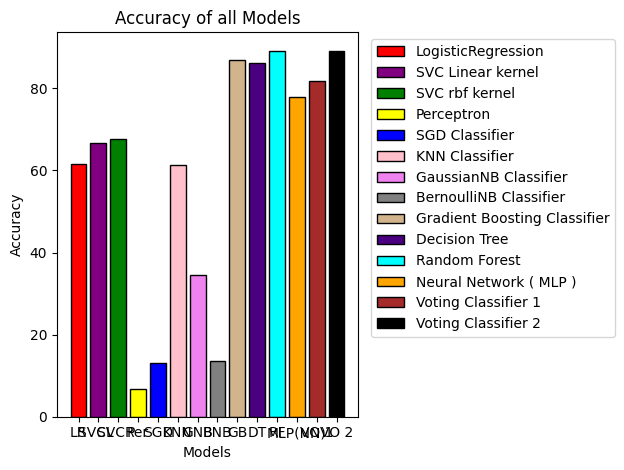

In [30]:
plt.bar(['LR', 'SVCL ', 'SVCR ', 'Per', 'SGD', 'KNN', 'GNB', 'BNB', 'GB', 'DT', 'RF', 'MLP(NN)','VO 1','VO 2'],
        accuracies_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange','brown','black'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()


In [27]:

print('Model                     Accuracy')
for i in range(len(models_names)):
    print( models_names[i]  ,'    :  ', accuracies_of_models[i])


Model                     Accuracy
LogisticRegression     :   61.58038147138964
SVC Linear kernel      :   66.62125340599455
SVC rbf kernel      :   67.65667574931881
Perceptron     :   6.730245231607629
SGD Classifier     :   13.051771117166213
KNN Classifier     :   61.22615803814714
GaussianNB Classifier     :   34.63215258855586
BernoulliNB Classifier     :   13.460490463215258
Gradient Boosting Classifier     :   86.83923705722071
Decision Tree     :   86.10354223433242
Random Forest     :   89.15531335149863
Neural Network ( MLP )     :   77.87465940054496
Voting Classifier 1     :   81.68937329700272
Voting Classifier 2     :   89.1825613079019
